In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Importing csv  

kc_house_data = pd.read_csv('kc_house_data.csv')
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house_data["price"].unique

<bound method Series.unique of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>

In [5]:
cleaned_house_data = kc_house_data.drop(['id', 'date', 'waterfront', 'view', 'sqft_living15', 'sqft_lot15'], axis=1)
cleaned_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [6]:
cleaned_house_data.to_csv("cleaned_house_data.csv", index=False)

In [7]:
columns = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement",
           "yr_built", "yr_renovated", "zipcode", "lat", "long"]
target = ["price"]


In [8]:
# Create our features
X = cleaned_house_data.drop(columns='price')
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = cleaned_house_data['price']

In [9]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [10]:
y.value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3625, dtype: int64

In [11]:
pip install imbalanced-learn==0.9.0

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install scikit-learn==1.0.2


Note: you may need to restart the kernel to use updated packages.


In [13]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.39873715 -1.44746357 -0.97983502 -0.22832133 -0.915427   -0.62918687
  -0.55883575 -0.73470764 -0.65868104 -0.54489777 -0.21012839  1.87015159
  -0.35257175 -0.30607896]
 [-0.39873715  0.1756067   0.53363434 -0.18988538  0.93650577 -0.62918687
  -0.55883575  0.46084084  0.2451414  -0.6810785   4.7466776   0.87956753
   1.16156823 -0.74634143]
 [-1.47395936 -1.44746357 -1.42625404 -0.12329847 -0.915427   -0.62918687
  -1.40958711 -1.22983377 -0.65868104 -1.29389179 -0.21012839 -0.9333882
   1.28353661 -0.13565477]
 [ 0.67648506  1.14944885 -0.13055006 -0.2440144  -0.915427    2.44429394
  -0.55883575 -0.89169885  1.39751501 -0.20444594 -0.21012839  1.08516045
  -0.28328794 -1.271816  ]
 [-0.39873715 -0.14900736 -0.43542158 -0.16965339 -0.915427   -0.62918687
   0.29191561 -0.13089528 -0.65868104  0.54454807 -0.21012839 -0.073636
   0.40955019  1.19933466]]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_train, y_train)

0.6641903657430612

In [17]:
model.score(X_test, y_test)

0.6466130130784373

In [18]:
new_kc_data = cleaned_house_data.drop(["sqft_lot", "floors", "condition", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat","long", "sqft_above"], axis=1)

In [19]:
new_kc_data.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7
1,538000.0,3,2.25,2570,7
2,180000.0,2,1.00,770,6
3,604000.0,4,3.00,1960,7
4,510000.0,3,2.00,1680,8


In [20]:
X = new_kc_data.drop(columns='price')
y = new_kc_data['price']

In [21]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.39873715 -1.44746357 -0.97983502 -0.55883575]
 [-0.39873715  0.1756067   0.53363434 -0.55883575]
 [-1.47395936 -1.44746357 -1.42625404 -1.40958711]
 [ 0.67648506  1.14944885 -0.13055006 -0.55883575]
 [-0.39873715 -0.14900736 -0.43542158  0.29191561]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.score(X_train, y_train)

0.5412338290802883

In [25]:
model.score(X_test, y_test)

0.5470671619898445

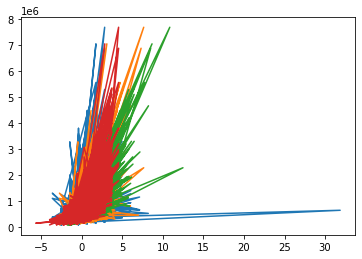

In [26]:
plt.plot(X, y)


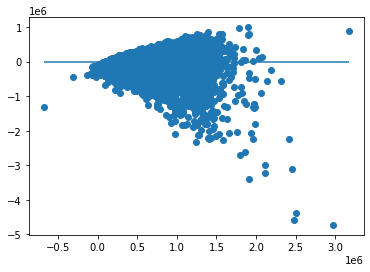

In [27]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

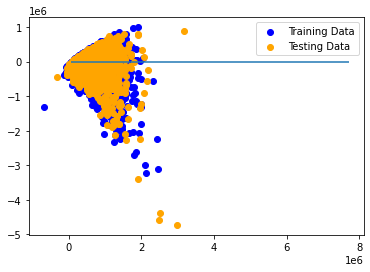

In [28]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())

plt.show()

In [30]:
from sklearn import linear_model

In [31]:
X = new_kc_data.drop(columns='price')
y = new_kc_data['price']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [32]:
regr.score(X, y)

0.5433809656582635